In [1]:
# Digital Image Forensics Tool
# Importing necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import os

In [2]:
def display_image(img, title=''):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

In [3]:
# Data Preprocessing
def preprocess_image(image_path):
    # Read the image
    img = cv2.imread(image_path)
    # Resize image if necessary
    img_resized = cv2.resize(img, (512, 512))
    return img_resized

In [4]:
# Feature Extraction
def extract_features(image):
    # Convert to grayscale for analysis
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Noise Analysis (example: calculating noise level)
    noise = cv2.Laplacian(gray_image, cv2.CV_64F).var()  # Variance of Laplacian as noise measure

    return noise

In [5]:
# Tampering Detection - Error Level Analysis (ELA)
def error_level_analysis(image_path):
    original = cv2.imread(image_path)
    # Save the original image with a slight change (for ELA)
    temp_path = 'temp_image.jpg'
    cv2.imwrite(temp_path, original)

    # Read the temp image
    modified = cv2.imread(temp_path)

    # Calculate the error level image
    ela_image = cv2.absdiff(original, modified)
    ela_image = cv2.cvtColor(ela_image, cv2.COLOR_BGR2GRAY)
    ela_image = cv2.normalize(ela_image, None, 0, 255, cv2.NORM_MINMAX)

    return ela_image

In [6]:
# Visualization
def visualize_results(original_image, noise, ela_image):
    # Display the original image
    display_image(original_image, title='Original Image')

    # Display noise level
    print(f"Estimated Noise Level: {noise}")

    # Display Error Level Analysis result
    display_image(ela_image, title='Error Level Analysis')

In [7]:
# Main function to run the tool
def run_forensics_tool(image_path):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)

    # Extract features
    noise_level = extract_features(preprocessed_image)

    # Perform ELA
    ela_result = error_level_analysis(image_path)

    # Visualize results
    visualize_results(preprocessed_image, noise_level, ela_result)

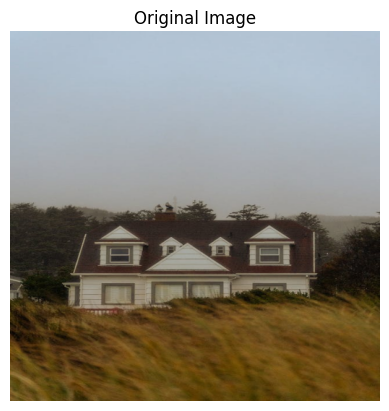

Estimated Noise Level: 218.51507561228937


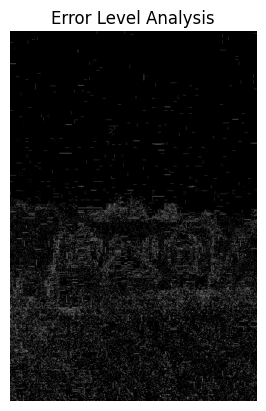

In [8]:
# Example usage
image_path = 'path_to_your_image.jpg'  # Replace with your image path
run_forensics_tool("./sample.jpg")